In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

### Data loading

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Hyperparameters

In [3]:
l_r = 0.01 # Learning rate
epoch = 2000
batch_size = 128

In [4]:
n_inputs = 28 # MNIST data input, img shape = (28, 28), view the graph row by row
n_steps = 28 # Time steps - shift 28 times
n_hidden_units = 128 # Neuron no. in hidden layer
n_classes = 10 # 0~9

### Placeholder - input and output data holders

In [5]:
x = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_classes])

In [6]:
# create static initial parameters
w_h1 = tf.random_normal([n_inputs, n_hidden_units])
w_out = tf.random_normal([n_hidden_units, n_classes])
b_h1 = tf.random_normal([n_hidden_units, ])
b_out = tf.random_normal([n_classes, ])

### Variables: weights and biases

In [7]:
def get_static_w_b():
    # create static initial parameters
    w_h1 = tf.random_normal([n_inputs, n_hidden_units])
    w_out = tf.random_normal([n_hidden_units, n_classes])
    b_h1 = tf.random_normal([n_hidden_units, ])
    b_out = tf.random_normal([n_classes, ])
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        w_h1, w_out, b_h1, b_out = sess.run([w_h1, w_out, b_h1, b_out])
    weights = dict()
    biases = dict()
    weights['b1'] = {
        # (28 inputs, 128 neurons)
        'h1':tf.Variable(tf.constant(w_h1)),
        # (128 inputs, 10 neurons)
        'out':tf.Variable(tf.constant(w_out))
    }
    biases['b1'] = {
        # (128 neurons, )
        'h1':tf.Variable(tf.constant(b_h1)),
        # (10 neurons, )
        'out':tf.Variable(tf.constant(b_out))
    }
    weights['b2'] = {
        # (28 inputs, 128 neurons)
        'h1':tf.Variable(tf.constant(w_h1)),
        # (128 inputs, 10 neurons)
        'out':tf.Variable(tf.constant(w_out))
    }
    biases['b2'] = {
        # (128 neurons, )
        'h1':tf.Variable(tf.constant(b_h1)),
        # (10 neurons, )
        'out':tf.Variable(tf.constant(b_out))
    }
    weights['b3'] = {
        # (28 inputs, 128 neurons)
        'h1':tf.Variable(tf.constant(w_h1)),
        # (128 inputs, 10 neurons)
        'out':tf.Variable(tf.constant(w_out))
    }
    biases['b3'] = {
        # (128 neurons, )
        'h1':tf.Variable(tf.constant(b_h1)),
        # (10 neurons, )
        'out':tf.Variable(tf.constant(b_out))
    }
    weights['b4'] = {
        # (28 inputs, 128 neurons)
        'h1':tf.Variable(tf.constant(w_h1)),
        # (128 inputs, 10 neurons)
        'out':tf.Variable(tf.constant(w_out))
    }
    biases['b4'] = {
        # (128 neurons, )
        'h1':tf.Variable(tf.constant(b_h1)),
        # (10 neurons, )
        'out':tf.Variable(tf.constant(b_out))
    }
    weights['b5'] = {
        # (28 inputs, 128 neurons)
        'h1':tf.Variable(tf.constant(w_h1)),
        # (128 inputs, 10 neurons)
        'out':tf.Variable(tf.constant(w_out))
    }
    biases['b5'] = {
        # (128 neurons, )
        'h1':tf.Variable(tf.constant(b_h1)),
        # (10 neurons, )
        'out':tf.Variable(tf.constant(b_out))
    }
    weights['b6'] = {
        # (28 inputs, 128 neurons)
        'h1':tf.Variable(tf.constant(w_h1)),
        # (128 inputs, 10 neurons)
        'out':tf.Variable(tf.constant(w_out))
    }
    biases['b6'] = {
        # (128 neurons, )
        'h1':tf.Variable(tf.constant(b_h1)),
        # (10 neurons, )
        'out':tf.Variable(tf.constant(b_out))
    }
    weights['b7'] = {
        # (28 inputs, 128 neurons)
        'h1':tf.Variable(tf.constant(w_h1)),
        # (128 inputs, 10 neurons)
        'out':tf.Variable(tf.constant(w_out))
    }
    biases['b7'] = {
        # (128 neurons, )
        'h1':tf.Variable(tf.constant(b_h1)),
        # (10 neurons, )
        'out':tf.Variable(tf.constant(b_out))
    }
    weights['b8'] = {
        # (28 inputs, 128 neurons)
        'h1':tf.Variable(tf.constant(w_h1)),
        # (128 inputs, 10 neurons)
        'out':tf.Variable(tf.constant(w_out))
    }
    biases['b8'] = {
        # (128 neurons, )
        'h1':tf.Variable(tf.constant(b_h1)),
        # (10 neurons, )
        'out':tf.Variable(tf.constant(b_out))
    }
    weights['b9'] = {
        # (28 inputs, 128 neurons)
        'h1':tf.Variable(tf.constant(w_h1)),
        # (128 inputs, 10 neurons)
        'out':tf.Variable(tf.constant(w_out))
    }
    biases['b9'] = {
        # (128 neurons, )
        'h1':tf.Variable(tf.constant(b_h1)),
        # (10 neurons, )
        'out':tf.Variable(tf.constant(b_out))
    }
    weights['b10'] = {
        # (28 inputs, 128 neurons)
        'h1':tf.Variable(tf.constant(w_h1)),
        # (128 inputs, 10 neurons)
        'out':tf.Variable(tf.constant(w_out))
    }
    biases['b10'] = {
        # (128 neurons, )
        'h1':tf.Variable(tf.constant(b_h1)),
        # (10 neurons, )
        'out':tf.Variable(tf.constant(b_out))
    }
    return weights, biases

In [8]:
def RNN(X, weights, biases, b='b1'):
    # h1
    X = tf.reshape(X, [-1, n_inputs])
    X_in = tf.matmul(X, weights[b]['h1']) + biases[b]['h1']
    X_in = tf.reshape(X_in, [-1, n_steps, n_hidden_units])
    f_b = float(b[1:])
    with tf.variable_scope(b):
        # rnn cell
        rnn_cell = tf.contrib.rnn.core_rnn_cell.BasicLSTMCell(n_hidden_units,
                                                              forget_bias=f_b,
                                                              state_is_tuple=True)
        _init_state = rnn_cell.zero_state(batch_size, dtype=tf.float32)
        # outputs: the rnns outputs
        outputs, states = tf.nn.dynamic_rnn(cell=rnn_cell,
                                            inputs=X_in,
                                            initial_state=_init_state,
                                            time_major=False)
    
    # output layer
    outputs = tf.unstack(tf.transpose(outputs, [1, 0, 2]))
    results = tf.matmul(outputs[-1], weights[b]['out']) + biases[b]['out']
    
    return results

In [9]:
def get_pred(x, weights, biases):
    pred = dict()
    pred['b1'] = RNN(x, weights, biases, b='b1')
    pred['b2'] = RNN(x, weights, biases, b='b2')
    pred['b3'] = RNN(x, weights, biases, b='b3')
    pred['b4'] = RNN(x, weights, biases, b='b4')
    pred['b5'] = RNN(x, weights, biases, b='b5')
    pred['b6'] = RNN(x, weights, biases, b='b6')
    pred['b7'] = RNN(x, weights, biases, b='b7')
    pred['b8'] = RNN(x, weights, biases, b='b8')
    pred['b9'] = RNN(x, weights, biases, b='b9')
    pred['b10'] = RNN(x, weights, biases, b='b10')
    return pred

def get_loss(pred, y):
    loss = dict()
    loss['b1'] = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred['b1'], labels=y))
    loss['b2'] = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred['b2'], labels=y))
    loss['b3'] = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred['b3'], labels=y))
    loss['b4'] = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred['b4'], labels=y))
    loss['b5'] = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred['b5'], labels=y))
    loss['b6'] = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred['b6'], labels=y))
    loss['b7'] = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred['b7'], labels=y))
    loss['b8'] = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred['b8'], labels=y))
    loss['b9'] = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred['b9'], labels=y))
    loss['b10'] = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred['b10'], labels=y))
    return loss

def get_op(loss, l_r):
    train_op = dict()
    train_op['b1'] = tf.train.GradientDescentOptimizer(l_r).minimize(loss['b1'])
    train_op['b2'] = tf.train.GradientDescentOptimizer(l_r).minimize(loss['b2'])
    train_op['b3'] = tf.train.GradientDescentOptimizer(l_r).minimize(loss['b3'])
    train_op['b4'] = tf.train.GradientDescentOptimizer(l_r).minimize(loss['b4'])
    train_op['b5'] = tf.train.GradientDescentOptimizer(l_r).minimize(loss['b5'])
    train_op['b6'] = tf.train.GradientDescentOptimizer(l_r).minimize(loss['b6'])
    train_op['b7'] = tf.train.GradientDescentOptimizer(l_r).minimize(loss['b7'])
    train_op['b8'] = tf.train.GradientDescentOptimizer(l_r).minimize(loss['b8'])
    train_op['b9'] = tf.train.GradientDescentOptimizer(l_r).minimize(loss['b9'])
    train_op['b10'] = tf.train.GradientDescentOptimizer(l_r).minimize(loss['b10'])
    return train_op

In [10]:
ex_time = 0

In [11]:
import time
test_batch_size = batch_size
loss_val_train = dict()
loss_val_test = dict()
loss_val_train['b1'] = list()
loss_val_train['b2'] = list()
loss_val_train['b3'] = list()
loss_val_train['b4'] = list()
loss_val_train['b5'] = list()
loss_val_train['b6'] = list()
loss_val_train['b7'] = list()
loss_val_train['b8'] = list()
loss_val_train['b9'] = list()
loss_val_train['b10'] = list()
loss_val_test['b1'] = list()
loss_val_test['b2'] = list()
loss_val_test['b3'] = list()
loss_val_test['b4'] = list()
loss_val_test['b5'] = list()
loss_val_test['b6'] = list()
loss_val_test['b7'] = list()
loss_val_test['b8'] = list()
loss_val_test['b9'] = list()
loss_val_test['b10'] = list()
for ex in range(10):
    ex_time += 1
    with tf.variable_scope('ex'+str(ex_time)):
        weights, biases = get_static_w_b()
        pred = get_pred(x, weights, biases)
        loss = get_loss(pred, y)
        train_op = get_op(loss, l_r)
    init2 = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init2)
        startTime = time.time()
        for epo in range(epoch):
            # read data
            batch_xs_train, batch_ys_train = mnist.train.next_batch(batch_size)
            batch_xs_train = batch_xs_train.reshape([batch_size, n_steps, n_inputs])
            # Training
            sess.run([train_op['b1'], train_op['b2'], train_op['b3'], train_op['b4'], train_op['b5'],
                      train_op['b6'], train_op['b7'], train_op['b8'], train_op['b9'], train_op['b10']],
                     feed_dict={
                         x:batch_xs_train,
                         y:batch_ys_train
                     })
            # find loss for training set
            l_b1, l_b2, l_b3, l_b4, l_b5, l_b6, l_b7, l_b8, l_b9, l_b10 = sess.run([loss['b1'], loss['b2'],
                                                        loss['b3'], loss['b4'], loss['b5'], loss['b6'], 
                                                        loss['b7'], loss['b8'], loss['b9'], loss['b10']],
                                                        feed_dict={
                                                            x:batch_xs_train,
                                                            y:batch_ys_train
                                                        })
            loss_val_train['b1'].append(l_b1)
            loss_val_train['b2'].append(l_b2)
            loss_val_train['b3'].append(l_b3)
            loss_val_train['b4'].append(l_b4)
            loss_val_train['b5'].append(l_b5)
            loss_val_train['b6'].append(l_b6)
            loss_val_train['b7'].append(l_b7)
            loss_val_train['b8'].append(l_b8)
            loss_val_train['b9'].append(l_b9)
            loss_val_train['b10'].append(l_b10)
            # read test data
            batch_xs_test, batch_ys_test = mnist.test.next_batch(batch_size)
            batch_xs_test = batch_xs_test.reshape([test_batch_size, n_steps, n_inputs])
            # find loss for testing set
            l_b1, l_b2, l_b3, l_b4, l_b5, l_b6, l_b7, l_b8, l_b9, l_b10 = sess.run([loss['b1'], loss['b2'],
                                                        loss['b3'], loss['b4'], loss['b5'], loss['b6'], 
                                                        loss['b7'], loss['b8'], loss['b9'], loss['b10']],
                                                        feed_dict={
                                                            x:batch_xs_test,
                                                            y:batch_ys_test
                                                        })
            loss_val_test['b1'].append(l_b1)
            loss_val_test['b2'].append(l_b2)
            loss_val_test['b3'].append(l_b3)
            loss_val_test['b4'].append(l_b4)
            loss_val_test['b5'].append(l_b5)
            loss_val_test['b6'].append(l_b6)
            loss_val_test['b7'].append(l_b7)
            loss_val_test['b8'].append(l_b8)
            loss_val_test['b9'].append(l_b9)
            loss_val_test['b10'].append(l_b10)
            # print result each 100 epochs
            if (epo+1)%100 == 0:
                print('Epoch', epo+1,
                      ', Losses:', 
                      '%2.4f,%2.4f,%2.4f,%2.4f,%2.4f,%2.4f,%2.4f,%2.4f,%2.4f,%2.4f'\
                      % (l_b1, l_b2, l_b3, l_b4, l_b5, l_b6, l_b7, l_b8, l_b9, l_b10))
        endTime = time.time()
        timespan = endTime - startTime
        print('--------------------EX'+str(ex+1), 'done.', 'Spent', '%2.2f' % timespan, 'secs.')
        writer = tf.summary.FileWriter("logs/", sess.graph)
# tensorboard: terminal >> tensorboard --logdir='logs/'

Epoch 100 , Losses: 1.4673,1.3505,1.3562,1.5395,1.7304,1.7645,2.0142,1.8784,1.8582,1.8675
Epoch 200 , Losses: 0.9473,1.0569,1.0115,1.1233,1.4283,1.2188,1.7701,1.5777,1.6020,1.6678
Epoch 300 , Losses: 0.7341,0.6504,0.7474,1.0035,1.2510,1.1970,1.5746,1.2540,1.4456,1.4471
Epoch 400 , Losses: 0.7605,0.5156,0.5919,0.7826,0.9616,0.8428,1.3925,1.0168,1.1574,1.1486
Epoch 500 , Losses: 0.5627,0.5796,0.6863,0.6802,0.7967,0.8729,1.1829,0.9536,1.2431,1.1351
Epoch 600 , Losses: 0.4933,0.4610,0.5448,0.4977,0.7340,0.7262,1.0205,0.9431,0.8649,0.8703
Epoch 700 , Losses: 0.4043,0.4066,0.4311,0.5195,0.6753,0.5722,1.0339,0.6768,0.8870,0.8522
Epoch 800 , Losses: 0.3486,0.4074,0.4110,0.4391,0.4575,0.4763,0.7816,0.6020,0.6079,0.6948
Epoch 900 , Losses: 0.2650,0.3163,0.2756,0.3990,0.4793,0.3982,0.8380,0.5855,0.4958,0.6121
Epoch 1000 , Losses: 0.4096,0.3256,0.3398,0.4304,0.5147,0.4798,0.6981,0.6304,0.5251,0.5985
Epoch 1100 , Losses: 0.3599,0.2466,0.3189,0.4391,0.4867,0.5586,0.7729,0.5360,0.5393,0.6212
Epoch 12

Epoch 1000 , Losses: 0.3245,0.2767,0.2521,0.2721,0.4267,0.3767,0.5004,0.4160,0.6400,0.5158
Epoch 1100 , Losses: 0.2162,0.3191,0.2832,0.2512,0.3336,0.3511,0.4099,0.3768,0.5208,0.5374
Epoch 1200 , Losses: 0.2097,0.2867,0.2419,0.2746,0.4350,0.4905,0.4248,0.4476,0.5646,0.6141
Epoch 1300 , Losses: 0.2215,0.2133,0.2668,0.1842,0.3238,0.2856,0.3794,0.4004,0.5793,0.4772
Epoch 1400 , Losses: 0.2633,0.3161,0.3115,0.4241,0.4785,0.4319,0.5353,0.4539,0.6068,0.5831
Epoch 1500 , Losses: 0.1922,0.2101,0.2605,0.2906,0.3663,0.3538,0.4330,0.3901,0.5396,0.5228
Epoch 1600 , Losses: 0.3114,0.3733,0.4932,0.3914,0.4793,0.4688,0.4532,0.5028,0.5886,0.6219
Epoch 1700 , Losses: 0.2651,0.3197,0.3007,0.3076,0.3108,0.3701,0.3473,0.3810,0.4181,0.4475
Epoch 1800 , Losses: 0.2252,0.1943,0.2346,0.2791,0.3617,0.2649,0.3026,0.3369,0.4959,0.4146
Epoch 1900 , Losses: 0.3391,0.4095,0.4184,0.4062,0.3928,0.4284,0.4231,0.5376,0.4648,0.4261
Epoch 2000 , Losses: 0.2589,0.2609,0.2810,0.2889,0.3701,0.3241,0.4011,0.4986,0.4477,0.5183

Epoch 1900 , Losses: 0.3054,0.1926,0.2523,0.3207,0.3196,0.2967,0.3221,0.3337,0.3853,0.3502
Epoch 2000 , Losses: 0.2963,0.3405,0.2279,0.4105,0.3484,0.4300,0.3886,0.4448,0.4354,0.3991
--------------------EX9 done. Spent 311.94 secs.
Epoch 100 , Losses: 1.3968,1.2179,1.3343,1.5752,1.7290,1.7588,1.5116,1.7035,1.7544,1.8316
Epoch 200 , Losses: 0.9521,0.9089,1.0119,1.2441,1.3164,1.2625,1.2771,1.3586,1.4901,1.5044
Epoch 300 , Losses: 0.7609,0.6857,1.0111,0.9409,1.1499,0.9897,1.0171,1.1188,1.0608,1.4190
Epoch 400 , Losses: 0.7097,0.6215,0.6614,0.8934,0.9227,1.0438,1.0076,1.1606,1.0290,1.1968
Epoch 500 , Losses: 0.6541,0.5010,0.5802,0.6874,0.7774,0.7197,0.8709,0.7689,0.9356,0.9423
Epoch 600 , Losses: 0.5549,0.4690,0.5076,0.6791,0.6598,0.7365,0.7653,1.0379,1.0078,0.8690
Epoch 700 , Losses: 0.6353,0.5242,0.5896,0.6912,0.6527,0.7475,0.7145,0.6816,0.8150,0.8132
Epoch 800 , Losses: 1.0116,0.4663,0.4285,0.6727,0.6980,0.9455,0.6506,0.6348,0.6528,0.7241
Epoch 900 , Losses: 0.4320,0.4040,0.4543,0.6075,0

In [12]:
#save the result
np.save('./diffBias_data/loss_val_train_diffBias_1to10', loss_val_train)
np.save('./diffBias_data/loss_val_test_diffBias_1to10', loss_val_test)

In [4]:
import numpy as np
epoch = 2000
loss_val_train = np.load('./diffBias_data/loss_val_train_diffBias_1to10.npy')
loss_val_test = np.load('./diffBias_data/loss_val_test_diffBias_1to10.npy')

loss_val_train = loss_val_train[None][0]
loss_val_test = loss_val_test[None][0]

In [5]:
# result ploting
import matplotlib.pyplot as plt

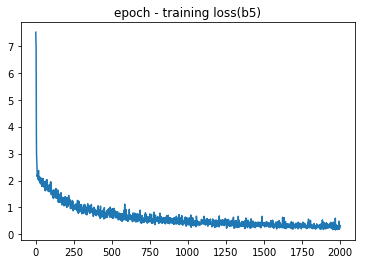

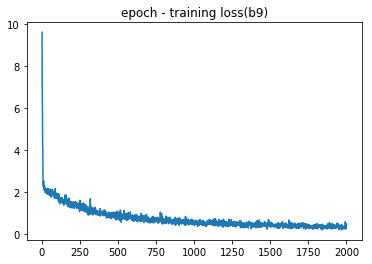

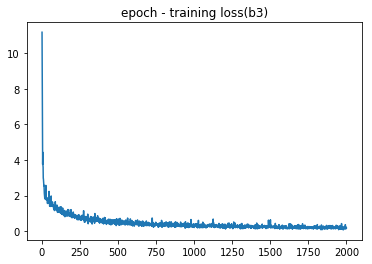

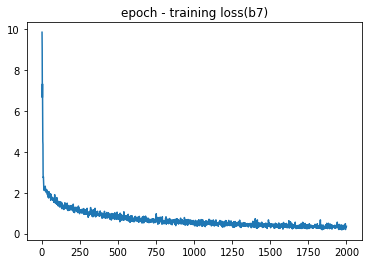

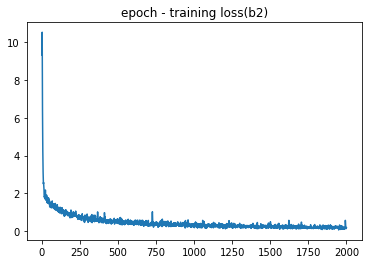

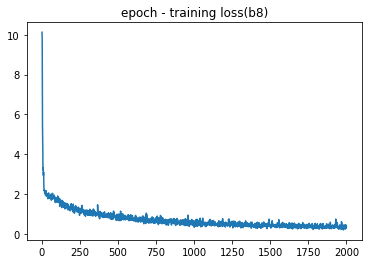

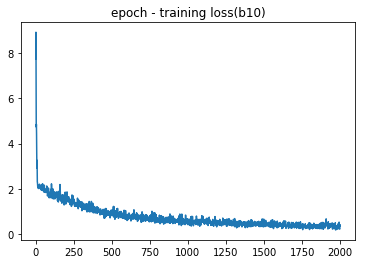

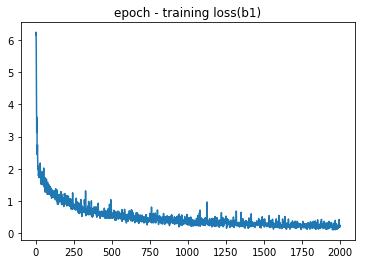

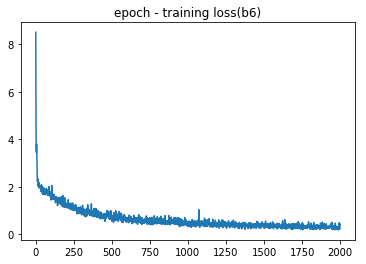

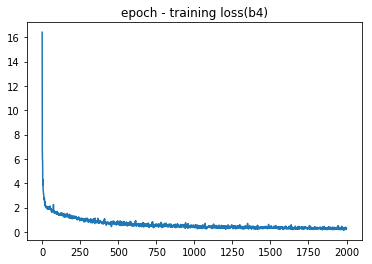

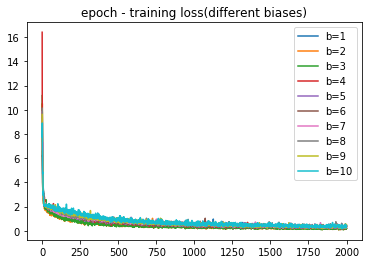

In [6]:
# epoch v.s.training loss
i = 0
for op, losses in loss_val_train.items():
    plt.close()
    plt.figure(i)
    plt.plot(range(1, len(losses[-epoch:])+1), losses[-epoch:])
    plt.title('epoch - training loss('+op+')')
    plt.show()
    i += 1
plt.plot(range(1, len(loss_val_train['b1'][-epoch:])+1), loss_val_train['b1'][-epoch:], #'b',
         range(1, len(loss_val_train['b2'][-epoch:])+1), loss_val_train['b2'][-epoch:], #'r',
         range(1, len(loss_val_train['b3'][-epoch:])+1), loss_val_train['b3'][-epoch:], #'g',
         range(1, len(loss_val_train['b4'][-epoch:])+1), loss_val_train['b4'][-epoch:], #'k',
         range(1, len(loss_val_train['b5'][-epoch:])+1), loss_val_train['b5'][-epoch:], #'k',
         range(1, len(loss_val_train['b6'][-epoch:])+1), loss_val_train['b6'][-epoch:], #'k',
         range(1, len(loss_val_train['b7'][-epoch:])+1), loss_val_train['b7'][-epoch:], #'k',
         range(1, len(loss_val_train['b8'][-epoch:])+1), loss_val_train['b8'][-epoch:], #'k',
         range(1, len(loss_val_train['b9'][-epoch:])+1), loss_val_train['b9'][-epoch:], #'k',
         range(1, len(loss_val_train['b10'][-epoch:])+1), loss_val_train['b10'][-epoch:]) #'k',)
plt.title('epoch - training loss(different biases)')
plt.legend(['b=1', 'b=2', 'b=3', 'b=4', 'b=5', 'b=6', 'b=7', 'b=8', 'b=9', 'b=10'], loc=1)
plt.savefig('./diffBias_data/epoch_loss_train_1to10.png')
plt.show()

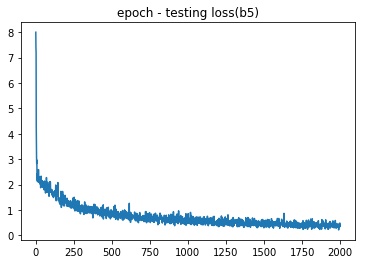

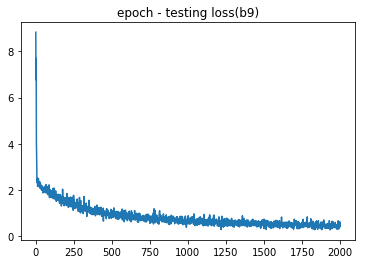

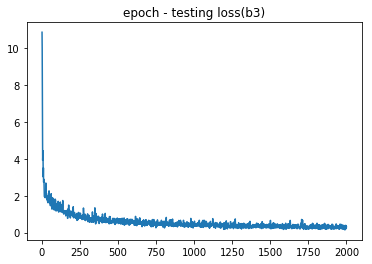

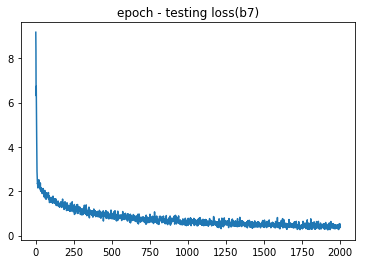

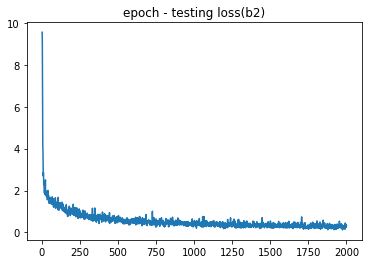

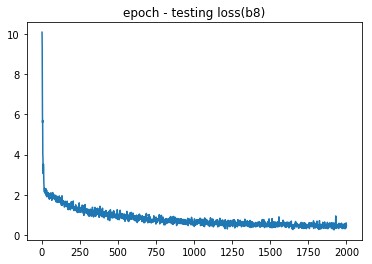

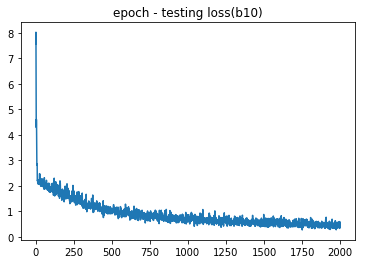

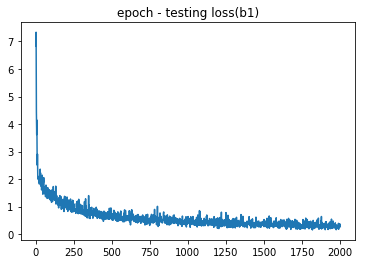

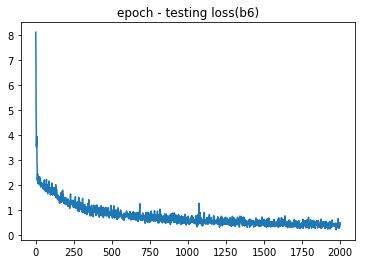

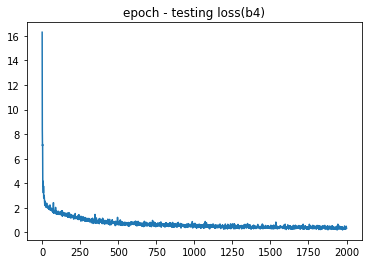

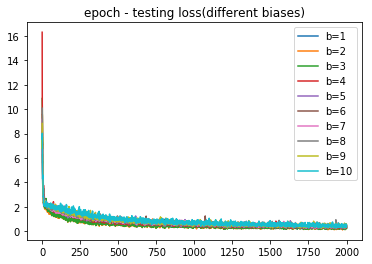

In [7]:
# epoch v.s. testing loss
i = 0
for op, losses in loss_val_test.items():
    plt.close()
    plt.figure(i)
    plt.plot(range(1, len(losses[-epoch:])+1), losses[-epoch:])
    plt.title('epoch - testing loss('+op+')')
    plt.show()
    i += 1
plt.plot(range(1, len(loss_val_test['b1'][-epoch:])+1), loss_val_test['b1'][-epoch:], #'b',
         range(1, len(loss_val_test['b2'][-epoch:])+1), loss_val_test['b2'][-epoch:], #'r',
         range(1, len(loss_val_test['b3'][-epoch:])+1), loss_val_test['b3'][-epoch:], #'g',
         range(1, len(loss_val_test['b4'][-epoch:])+1), loss_val_test['b4'][-epoch:], #'k',
         range(1, len(loss_val_test['b5'][-epoch:])+1), loss_val_test['b5'][-epoch:], #'k',
         range(1, len(loss_val_test['b6'][-epoch:])+1), loss_val_test['b6'][-epoch:], #'k',
         range(1, len(loss_val_test['b7'][-epoch:])+1), loss_val_test['b7'][-epoch:], #'k',
         range(1, len(loss_val_test['b8'][-epoch:])+1), loss_val_test['b8'][-epoch:], #'k',
         range(1, len(loss_val_test['b9'][-epoch:])+1), loss_val_test['b9'][-epoch:], #'k',
         range(1, len(loss_val_test['b10'][-epoch:])+1), loss_val_test['b10'][-epoch:]) #'k',)
plt.title('epoch - testing loss(different biases)')
plt.legend(['b=1', 'b=2', 'b=3', 'b=4', 'b=5', 'b=6', 'b=7', 'b=8', 'b=9', 'b=10'], loc=1)
plt.savefig('./diffBias_data/epoch_loss_test_1to10.png')
plt.show()

## ANOVA and T-test

In [8]:
from scipy import stats as st
# ANOVA:  f_val, p_val = st.f_oneway(data_array1, data_array2, ...)

In [9]:
# data extract
loss_means_train = dict()
for bias, losses in loss_val_train.items():
    mean = list()
    ex_time = len(losses)/epoch
    print(bias, ex_time)
    for ex in range(int(ex_time)):
        mean.append(np.mean(losses[(ex+1)*epoch-100:(ex+1)*epoch]))
    loss_means_train[bias] = mean

loss_means_test = dict()
for bias, losses in loss_val_test.items():
    mean = list()
    ex_time = len(losses)/epoch
    
    print(bias, ex_time)
    for ex in range(int(ex_time)):
        mean.append(np.mean(losses[(ex+1)*epoch-100:(ex+1)*epoch]))
    loss_means_test[bias] = mean

b5 10.0
b9 10.0
b3 10.0
b7 10.0
b2 10.0
b8 10.0
b10 10.0
b1 10.0
b6 10.0
b4 10.0
b5 10.0
b9 10.0
b3 10.0
b7 10.0
b2 10.0
b8 10.0
b10 10.0
b1 10.0
b6 10.0
b4 10.0


In [10]:
np.save('./diffBias_data/loss_means_train_diffBias_1to10', loss_means_train)
np.save('./diffBias_data/loss_means_test_diffBias_1to10', loss_means_test)
loss_means_train, loss_means_test

({'b1': [0.20842272,
   0.21625702,
   0.17923728,
   0.20070663,
   0.16738367,
   0.18188407,
   0.17049196,
   0.18806615,
   0.19289574,
   0.21144211],
  'b10': [0.33263031,
   0.32603753,
   0.33543277,
   0.37975132,
   0.37116122,
   0.28433469,
   0.28551948,
   0.35705212,
   0.27404869,
   0.36371821],
  'b2': [0.17941166,
   0.19492972,
   0.1836562,
   0.1796416,
   0.16751195,
   0.17660215,
   0.17505501,
   0.18757597,
   0.16587183,
   0.19914314],
  'b3': [0.19302259,
   0.21143089,
   0.21248654,
   0.19134033,
   0.19751219,
   0.22953795,
   0.20235088,
   0.21605001,
   0.20083307,
   0.20190525],
  'b4': [0.22595935,
   0.24186155,
   0.26710021,
   0.26064548,
   0.21548134,
   0.19917445,
   0.25515893,
   0.2291493,
   0.22897115,
   0.28538552],
  'b5': [0.2944546,
   0.30994734,
   0.28184199,
   0.27089077,
   0.26697502,
   0.29968742,
   0.32074165,
   0.26938817,
   0.27093545,
   0.29454097],
  'b6': [0.27643433,
   0.27739248,
   0.31819108,
   0.29414

### training loss

In [11]:
# ANOVA - find that whether biases effect the training loss or not
alpha = 0.05
f_val, p_val = st.f_oneway(loss_means_train['b1'],
                           loss_means_train['b2'],
                           loss_means_train['b3'],
                           loss_means_train['b4'],
                           loss_means_train['b5'],
                           loss_means_train['b6'],
                           loss_means_train['b7'],
                           loss_means_train['b8'],
                           loss_means_train['b9'],
                           loss_means_train['b10'])
print('F value:', f_val, ', P value:', p_val)
if p_val <= alpha:
    print('They are NOT identical at all.')
else:
    print('They are identical.')

F value: 50.8798976256 , P value: 1.68610103985e-31
They are NOT identical at all.


In [12]:
# sort them by means
mean = dict()
StD = dict()
for bias, mu in loss_means_train.items():
    mean[bias] = np.mean(mu)
    StD[bias] = np.std(mu)
mus_sort = sorted(mean.values())
bs_sort = sorted(mean, key=mean.__getitem__)

In [13]:
print('     bias    mean     StD    ')
for i in range(len(bs_sort)):
    print('%8s    %2.4f   %2.4f' % (bs_sort[i], mus_sort[i], StD[bs_sort[i]]))

     bias    mean     StD    
      b2    0.1809   0.0102
      b1    0.1917   0.0163
      b3    0.2056   0.0111
      b4    0.2409   0.0248
      b5    0.2879   0.0178
      b6    0.2987   0.0342
      b7    0.3069   0.0341
     b10    0.3310   0.0364
      b8    0.3415   0.0284
      b9    0.3475   0.0352


In [14]:
# t-test for each means
compare_flag = list() 
alpha = 0.05
for i in range(len(loss_means_train)-1):
    t_val, p_val = st.ttest_ind(loss_means_train[bs_sort[len(loss_means_train)-1-i]],
                                loss_means_train[bs_sort[len(loss_means_train)-2-i]],
                                equal_var=False)
    print('t value:', t_val, ', P value:', p_val)
    if p_val <= alpha:
        print(bs_sort[len(loss_means_train)-1-i] + ' > ' + bs_sort[len(loss_means_train)-2-i])
        compare_flag.append('>')
    else:
        print(bs_sort[len(loss_means_train)-1-i] + ' = ' + bs_sort[len(loss_means_train)-2-i])
        compare_flag.append('=')
    print('')

t value: 0.401726694476 , P value: 0.692829155649
b9 = b8

t value: 0.681080131208 , P value: 0.505004710297
b8 = b10

t value: 1.44819468446 , P value: 0.164833195099
b10 = b7

t value: 0.511430565358 , P value: 0.615266203969
b7 = b6

t value: 0.834059516956 , P value: 0.418686025255
b6 = b5

t value: 4.61989681817 , P value: 0.000269072871656
b5 > b4

t value: 3.8897567145 , P value: 0.00200247857365
b4 > b3

t value: 2.12235163478 , P value: 0.049888044369
b3 > b1

t value: 1.67388873338 , P value: 0.114711993065
b1 = b2



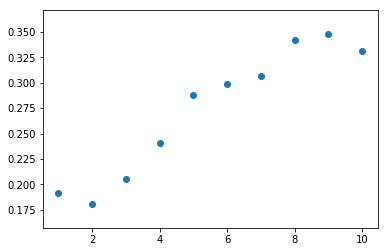

In [15]:
mus = list()
b = list()
for i in range(10):
    b.append(float(bs_sort[i][1:]))
    mus.append(mus_sort[i])

plt.scatter(b, mus)
plt.savefig('./diffBias_data/bias_loss_train_1to10.png')
plt.show()

### testing loss

In [16]:
# ANOVA - find that whether biases effect the training loss or not
alpha = 0.05
f_val, p_val = st.f_oneway(loss_means_test['b1'],
                           loss_means_test['b2'],
                           loss_means_test['b3'],
                           loss_means_test['b4'],
                           loss_means_test['b5'],
                           loss_means_test['b6'],
                           loss_means_test['b7'],
                           loss_means_test['b8'],
                           loss_means_test['b9'],
                           loss_means_test['b10'])
print('F value:', f_val, ', P value:', p_val)
if p_val <= alpha:
    print('They are NOT identical at all.')
else:
    print('They are identical.')

F value: 48.0017850812 , P value: 1.44159503341e-30
They are NOT identical at all.


In [17]:
# sort them by means
mean = dict()
StD = dict()
for bias, mu in loss_means_test.items():
    mean[bias] = np.mean(mu)
    StD[bias] = np.std(mu)
mus_sort = sorted(mean.values())
bs_sort = sorted(mean, key=mean.__getitem__)

In [18]:
print('     bias    mean     StD    ')
for i in range(len(bs_sort)):
    print('%8s    %2.4f   %2.4f' % (bs_sort[i], mus_sort[i], StD[bs_sort[i]]))

     bias    mean     StD    
      b2    0.2706   0.0118
      b1    0.2799   0.0223
      b3    0.2948   0.0170
      b4    0.3285   0.0238
      b5    0.3767   0.0199
      b6    0.3876   0.0388
      b7    0.4011   0.0305
     b10    0.4290   0.0354
      b8    0.4366   0.0344
      b9    0.4437   0.0392


In [19]:
# t-test for each means
compare_flag = list() 
alpha = 0.05
for i in range(len(loss_means_test)-1):
    t_val, p_val = st.ttest_ind(loss_means_test[bs_sort[len(loss_means_test)-1-i]],
                                loss_means_test[bs_sort[len(loss_means_test)-2-i]],
                                equal_var=False)
    print('t value:', t_val, ', P value:', p_val)
    if p_val <= alpha:
        print(bs_sort[len(loss_means_test)-1-i] + ' > ' + bs_sort[len(loss_means_test)-2-i])
        compare_flag.append('>')
    else:
        print(bs_sort[len(loss_means_test)-1-i] + ' = ' + bs_sort[len(loss_means_test)-2-i])
        compare_flag.append('=')
    print('')

t value: 0.409586534945 , P value: 0.687021969868
b9 = b8

t value: 0.460281562307 , P value: 0.650829694675
b8 = b10

t value: 1.7986315838 , P value: 0.0892356941112
b10 = b7

t value: 0.817334051176 , P value: 0.425014081302
b7 = b6

t value: 0.749152483604 , P value: 0.466668329515
b6 = b5

t value: 4.66935890629 , P value: 0.000205625464006
b5 > b4

t value: 3.44913368837 , P value: 0.00322331494414
b4 > b3

t value: 1.6002048019 , P value: 0.128164399186
b3 = b1

t value: 1.10579406144 , P value: 0.287897679008
b1 = b2



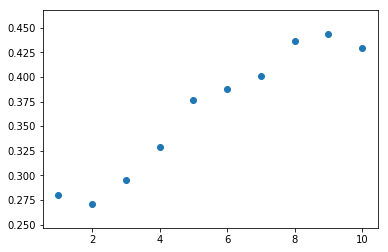

In [20]:
mus = list()
b = list()
for i in range(10):
    b.append(float(bs_sort[i][1:]))
    mus.append(mus_sort[i])

plt.scatter(b, mus)
plt.savefig('./diffBias_data/bias_loss_test_1to10.png')
plt.show()